In [2]:
import pandas as pd

In [3]:
df1 = pd.read_csv(r'Datasets\mental-and-substance-use-as-share-of-disease.csv')
df2 = pd.read_csv(r'Datasets\prevalence-by-mental-and-substance-use-disorder.csv')
df3 = pd.read_csv(r'Datasets\prevalence-of-depression-males-vs-females.csv')
df4 = pd.read_csv(r'Datasets\share-with-depression.csv')
df5 = pd.read_csv(r'Datasets\share-with-mental-and-substance-disorders.csv')
df6 = pd.read_csv(r'Datasets\share-with-mental-or-substance-disorders-by-sex.csv')


In [4]:
# Seleccionar solo las columnas relevantes
df1_clean = df1[['Entity', 'Year', 'DALYs (Disability-Adjusted Life Years) - Mental disorders - Sex: Both - Age: All Ages (Percent)']]
df2_clean = df2[['Entity', 'Year', 'Prevalence - Schizophrenia - Sex: Both - Age: Age-standardized (Percent)', 
                 'Prevalence - Bipolar disorder - Sex: Both - Age: Age-standardized (Percent)',
                 'Prevalence - Eating disorders - Sex: Both - Age: Age-standardized (Percent)',
                 'Prevalence - Anxiety disorders - Sex: Both - Age: Age-standardized (Percent)',
                 'Prevalence - Drug use disorders - Sex: Both - Age: Age-standardized (Percent)',
                 'Prevalence - Depressive disorders - Sex: Both - Age: Age-standardized (Percent)',
                 'Prevalence - Alcohol use disorders - Sex: Both - Age: Age-standardized (Percent)']]
df3_clean = df3[['Entity', 'Year', 'Prevalence - Depressive disorders - Sex: Male - Age: Age-standardized (Percent)',
                 'Prevalence - Depressive disorders - Sex: Female - Age: Age-standardized (Percent)']]
df4_clean = df4[['Entity', 'Year', 'Prevalence - Depressive disorders - Sex: Both - Age: Age-standardized (Percent)']]
df5_clean = df5[['Entity', 'Code', 'Year',
       'Prevalence - Mental disorders - Sex: Both - Age: Age-standardized (Percent)']]  # Ajustar si el nombre de la columna es diferente
df6_clean = df6[['Entity', 'Code', 'Year',
       'Prevalence - Mental and substance use disorders - Sex: Male - Age: Age-standardized (Percent)',
       'Prevalence - Mental and substance use disorders - Sex: Female - Age: Age-standardized (Percent)',
       'Population (historical estimates)', 'Continent']]

In [5]:
merged_df = pd.merge(df1_clean, df2_clean, on=['Entity', 'Year'], how='outer')
merged_df = pd.merge(merged_df, df3_clean, on=['Entity', 'Year'], how='outer')
merged_df = pd.merge(merged_df, df4_clean, on=['Entity', 'Year'], how='outer')
merged_df = pd.merge(merged_df, df5_clean, on=['Entity', 'Year'], how='outer')
merged_df = pd.merge(merged_df, df6_clean, on=['Entity', 'Year'], how='outer')

In [6]:
df_clean = merged_df[['Entity', 'Year', 'DALYs (Disability-Adjusted Life Years) - Mental disorders - Sex: Both - Age: All Ages (Percent)',
               'Prevalence - Schizophrenia - Sex: Both - Age: Age-standardized (Percent)',
               'Prevalence - Bipolar disorder - Sex: Both - Age: Age-standardized (Percent)',
               'Prevalence - Eating disorders - Sex: Both - Age: Age-standardized (Percent)',
               'Prevalence - Anxiety disorders - Sex: Both - Age: Age-standardized (Percent)',
               'Prevalence - Drug use disorders - Sex: Both - Age: Age-standardized (Percent)',
               'Prevalence - Depressive disorders - Sex: Both - Age: Age-standardized (Percent)_x',
               'Prevalence - Alcohol use disorders - Sex: Both - Age: Age-standardized (Percent)',
               'Prevalence - Mental disorders - Sex: Both - Age: Age-standardized (Percent)']]

In [7]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57207 entries, 0 to 57206
Data columns (total 11 columns):
 #   Column                                                                                           Non-Null Count  Dtype  
---  ------                                                                                           --------------  -----  
 0   Entity                                                                                           57207 non-null  object 
 1   Year                                                                                             57207 non-null  int64  
 2   DALYs (Disability-Adjusted Life Years) - Mental disorders - Sex: Both - Age: All Ages (Percent)  6840 non-null   float64
 3   Prevalence - Schizophrenia - Sex: Both - Age: Age-standardized (Percent)                         6840 non-null   float64
 4   Prevalence - Bipolar disorder - Sex: Both - Age: Age-standardized (Percent)                      6840 non-null   float64
 5   Prev

In [8]:
df_clean = df_clean.dropna()

# Verificar la limpieza
print(df_clean.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6780 entries, 0 to 6839
Data columns (total 11 columns):
 #   Column                                                                                           Non-Null Count  Dtype  
---  ------                                                                                           --------------  -----  
 0   Entity                                                                                           6780 non-null   object 
 1   Year                                                                                             6780 non-null   int64  
 2   DALYs (Disability-Adjusted Life Years) - Mental disorders - Sex: Both - Age: All Ages (Percent)  6780 non-null   float64
 3   Prevalence - Schizophrenia - Sex: Both - Age: Age-standardized (Percent)                         6780 non-null   float64
 4   Prevalence - Bipolar disorder - Sex: Both - Age: Age-standardized (Percent)                      6780 non-null   float64
 5   Preval

In [9]:
column_mapping = {
    'Prevalence - Schizophrenia - Sex: Both - Age: Age-standardized (Percent)': 'Schizophrenia',
    'Prevalence - Bipolar disorder - Sex: Both - Age: Age-standardized (Percent)': 'Bipolar_disorder',
    'Prevalence - Eating disorders - Sex: Both - Age: Age-standardized (Percent)': 'Eating_disorders',
    'Prevalence - Anxiety disorders - Sex: Both - Age: Age-standardized (Percent)': 'Anxiety_disorders',
    'Prevalence - Drug use disorders - Sex: Both - Age: Age-standardized (Percent)': 'Drug_use_disorders',
    'Prevalence - Depressive disorders - Sex: Both - Age: Age-standardized (Percent)_x': 'Depressive_disorders',
    'Prevalence - Alcohol use disorders - Sex: Both - Age: Age-standardized (Percent)': 'Alcohol_use_disorders',
    'Prevalence - Mental disorders - Sex: Both - Age: Age-standardized (Percent)': 'Mental_disorders',
    'DALYs (Disability-Adjusted Life Years) - Mental disorders - Sex: Both - Age: All Ages (Percent)': 'DALYs'
}

# Renombrar las columnas del DataFrame
df_clean.rename(columns=column_mapping, inplace=True)

# Verificar que las columnas han sido renombradas correctamente
print(df_clean.columns)

Index(['Entity', 'Year', 'DALYs', 'Schizophrenia', 'Bipolar_disorder',
       'Eating_disorders', 'Anxiety_disorders', 'Drug_use_disorders',
       'Depressive_disorders', 'Alcohol_use_disorders', 'Mental_disorders'],
      dtype='object')


In [10]:
df_clean['Schizophrenia'] = pd.cut(df_clean['Schizophrenia'], bins=2, labels=[0, 1])
df_clean['Bipolar_disorder'] = pd.cut(df_clean['Bipolar_disorder'], bins=2, labels=[0, 1])
df_clean['Eating_disorders'] = pd.cut(df_clean['Eating_disorders'], bins=2, labels=[0, 1])
df_clean['Anxiety_disorders'] = pd.cut(df_clean['Anxiety_disorders'], bins=2, labels=[0, 1])
df_clean['Drug_use_disorders'] = pd.cut(df_clean['Drug_use_disorders'], bins=2, labels=[0, 1])
df_clean['Depressive_disorders'] = pd.cut(df_clean['Depressive_disorders'], bins=2, labels=[0, 1])
df_clean['Alcohol_use_disorders'] = pd.cut(df_clean['Alcohol_use_disorders'], bins=2, labels=[0, 1])
df_clean['Mental_disorders'] = pd.cut(df_clean['Mental_disorders'], bins=2, labels=[0, 1])
df_clean['DALYs'] = pd.cut(df_clean['DALYs'], bins=2, labels=[0, 1])

In [11]:
df_clean = df_clean[['Schizophrenia', 'Bipolar_disorder', 'Eating_disorders', 'Anxiety_disorders',
             'Drug_use_disorders', 'Depressive_disorders', 'Alcohol_use_disorders',
             'Mental_disorders', 'DALYs']]

In [12]:
from sklearn.model_selection import train_test_split
from pgmpy.models import BayesianNetwork
from pgmpy.estimators import MaximumLikelihoodEstimator
from pgmpy.inference import VariableElimination
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score, KFold

train_data, test_data = train_test_split(df_clean, test_size=0.2, random_state=42)




# Definir la estructura de la red bayesiana
model = BayesianNetwork([
    ('Schizophrenia', 'DALYs'),
    ('Bipolar_disorder', 'DALYs'),
    ('Eating_disorders', 'DALYs'),
    ('Anxiety_disorders', 'DALYs'),
    ('Drug_use_disorders', 'DALYs'),
    ('Depressive_disorders', 'DALYs'),
    ('Alcohol_use_disorders', 'DALYs'),
    ('Mental_disorders', 'DALYs')
])

# Ajustar los parámetros del modelo utilizando el conjunto de entrenamiento
model.fit(train_data, estimator=MaximumLikelihoodEstimator)

# Crear el objeto de inferencia
inference = VariableElimination(model)

# Función para realizar predicciones
def predict(df_clean):
    y_pred = []
    for _, row in df_clean.iterrows():
        evidence = row.drop('DALYs').to_dict()
        result = inference.map_query(variables=['DALYs'], evidence=evidence)
        y_pred.append(result['DALYs'])
    return y_pred

# Realizar predicciones en el conjunto de validación
y_pred = predict(test_data)

# Calcular la precisión
accuracy = accuracy_score(test_data['DALYs'], y_pred)
print(f'Precisión del modelo: {accuracy:.2f}')




Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it

Precisión del modelo: 0.89


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it

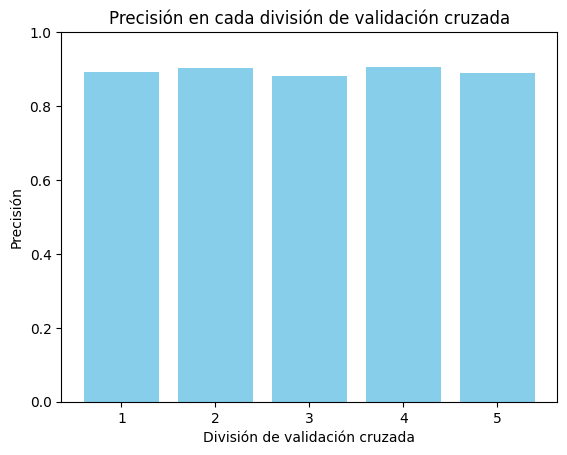

In [13]:
import matplotlib.pyplot as plt

accuracies = []

cv = KFold(n_splits=5, shuffle=True, random_state=42)
for train_index, test_index in cv.split(df_clean):
    train_data = df_clean.iloc[train_index]
    test_data = df_clean.iloc[test_index]

    # Ajustar los parámetros del modelo utilizando el conjunto de entrenamiento
    model.fit(train_data, estimator=MaximumLikelihoodEstimator)

    # Realizar predicciones en el conjunto de prueba
    y_pred = predict(test_data)

    # Calcular la precisión
    accuracy = accuracy_score(test_data['DALYs'], y_pred)
    accuracies.append(accuracy)

# Crear un gráfico de barras para visualizar las precisiones
plt.bar(range(1, len(accuracies) + 1), accuracies, color='skyblue')
plt.xlabel('División de validación cruzada')
plt.ylabel('Precisión')
plt.title('Precisión en cada división de validación cruzada')
plt.ylim(0, 1)  # Ajustar el límite del eje y entre 0 y 1
plt.show()



In [27]:
from itertools import combinations
from pgmpy.estimators import BicScore
from pgmpy.models import BayesianNetwork

def filter_structures(structures, max_indegree):
    filtered_structures = []
    for structure in structures:
        valid_structure = True
        for node in structure:
            indegree = sum(1 for edge in structure if edge[1] == node)
            if indegree > max_indegree:
                valid_structure = False
                break
        if valid_structure:
            filtered_structures.append(structure)
    return filtered_structures

# Definir la estructura de las variables
variable_nodes = [
    'Schizophrenia', 'Bipolar_disorder', 'Eating_disorders',
    'Anxiety_disorders', 'Drug_use_disorders', 'Depressive_disorders',
    'Alcohol_use_disorders', 'Mental_disorders', 'DALYs'
]

state_names = {
    'Schizophrenia': [0, 1],
    'Bipolar_disorder': [0, 1],
    'Eating_disorders': [0, 1],
    'Anxiety_disorders': [0, 1],
    'Drug_use_disorders': [0, 1],
    'Depressive_disorders': [0, 1],
    'Alcohol_use_disorders': [0, 1],
    'Mental_disorders': [0, 1],
    'DALYs': [0, 1]
}

# Crear objeto de puntuación BIC
bic = BicScore(df_clean, state_names=state_names)

# Generar todas las posibles estructuras de red
all_structures = list(combinations(variable_nodes, 2))  # Todas las combinaciones posibles de arcos entre nodos
filtered_structures = filter_structures(all_structures, max_indegree=3)  # Filtrar estructuras basadas en el límite de arcos entrantes

# Calcular puntuación BIC para cada estructura
structure_scores = {}
for structure in filtered_structures:
    # Convertir nombres de nodos en tuplas de arcos
    edges = [(x, y) for x, y in zip(structure[:-1], structure[1:])]
    model = BayesianNetwork(edges)
    score = bic.score(model)
    structure_scores[structure] = score

# Encontrar la mejor estructura según la puntuación BIC
best_structure = max(structure_scores, key=structure_scores.get)
print("Mejor estructura de red:")
print(best_structure)



Mejor estructura de red:
('Eating_disorders', 'Drug_use_disorders')


In [28]:
from pgmpy.models import BayesianNetwork
from pgmpy.factors.discrete import TabularCPD

# Definir la estructura de la red bayesiana
model = BayesianNetwork([('Eating_disorders', 'Drug_use_disorders')])

# Definir las probabilidades condicionales para Eating_disorders
cpd_eating_disorders = TabularCPD(variable='Eating_disorders', variable_card=2, 
                                   values=[[0.7], [0.3]],
                                   state_names={'Eating_disorders': ['S', 'N']})

# Definir las probabilidades condicionales para Drug_use_disorders
cpd_drug_use_disorders = TabularCPD(variable='Drug_use_disorders', variable_card=2,
                                     values=[[0.8, 0.4],
                                             [0.2, 0.6]],
                                     evidence=['Eating_disorders'],
                                     evidence_card=[2],
                                     state_names={'Drug_use_disorders': ['S', 'N'],
                                                  'Eating_disorders': ['S', 'N']})

# Agregar las probabilidades condicionales al modelo
model.add_cpds(cpd_eating_disorders, cpd_drug_use_disorders)

# Verificar la validez de la red
assert model.check_model()

# Imprimir la estructura del modelo
print(model.edges())



[('Eating_disorders', 'Drug_use_disorders')]
